In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy import ma

import pandas as pd
from pandas import DataFrame, Series  
import pims
import trackpy as tp

import cv2

import scipy
from scipy import signal

In [3]:
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30,20))
mpl.rc('image', cmap='gray')

In [4]:
path='E:/Hard Drive Quincke Rotation/2019-02-05/150V.mov'

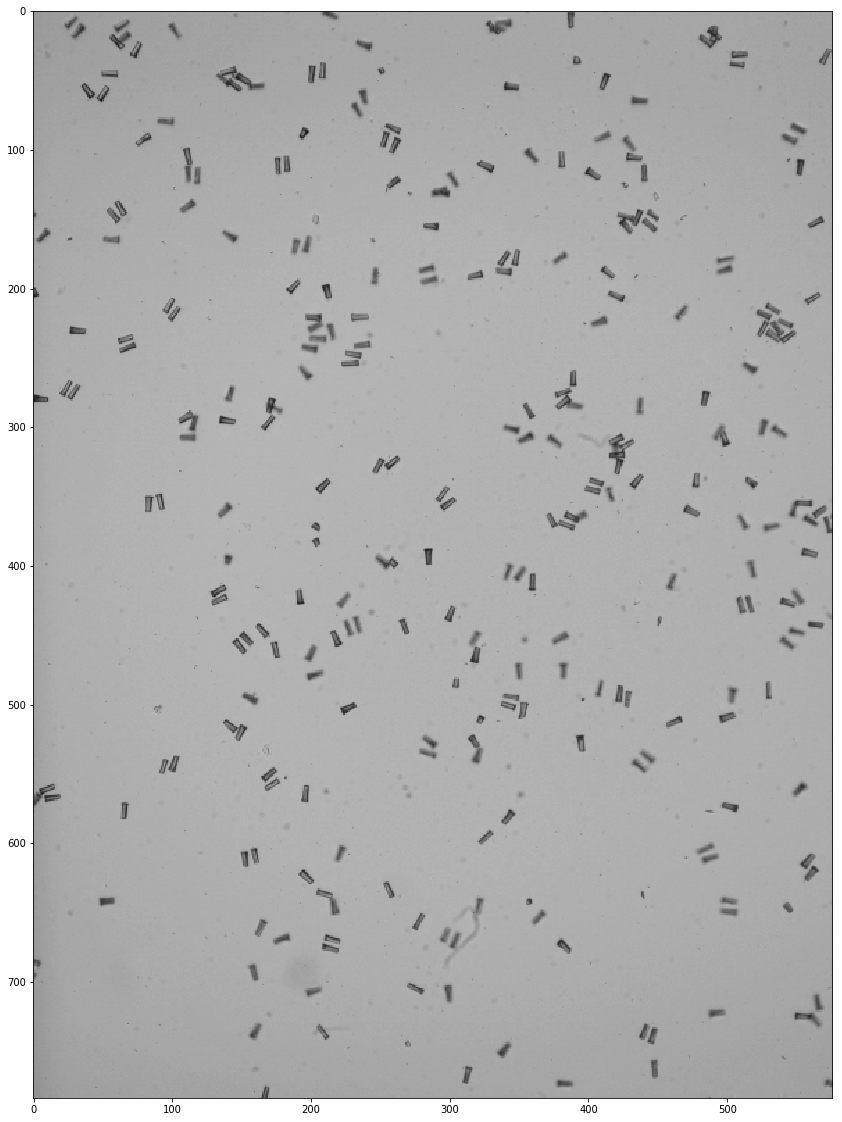

In [5]:
p = pims.Video(path)

plt.imshow(p[1])

In [6]:
length=len(p)-1
length

4300

In [7]:
leg=1000

In [8]:
zoom=2
fps=500

In [9]:
gap=int(length/leg)
gap

4

In [10]:
p1=[]
p1=p[:][::gap]

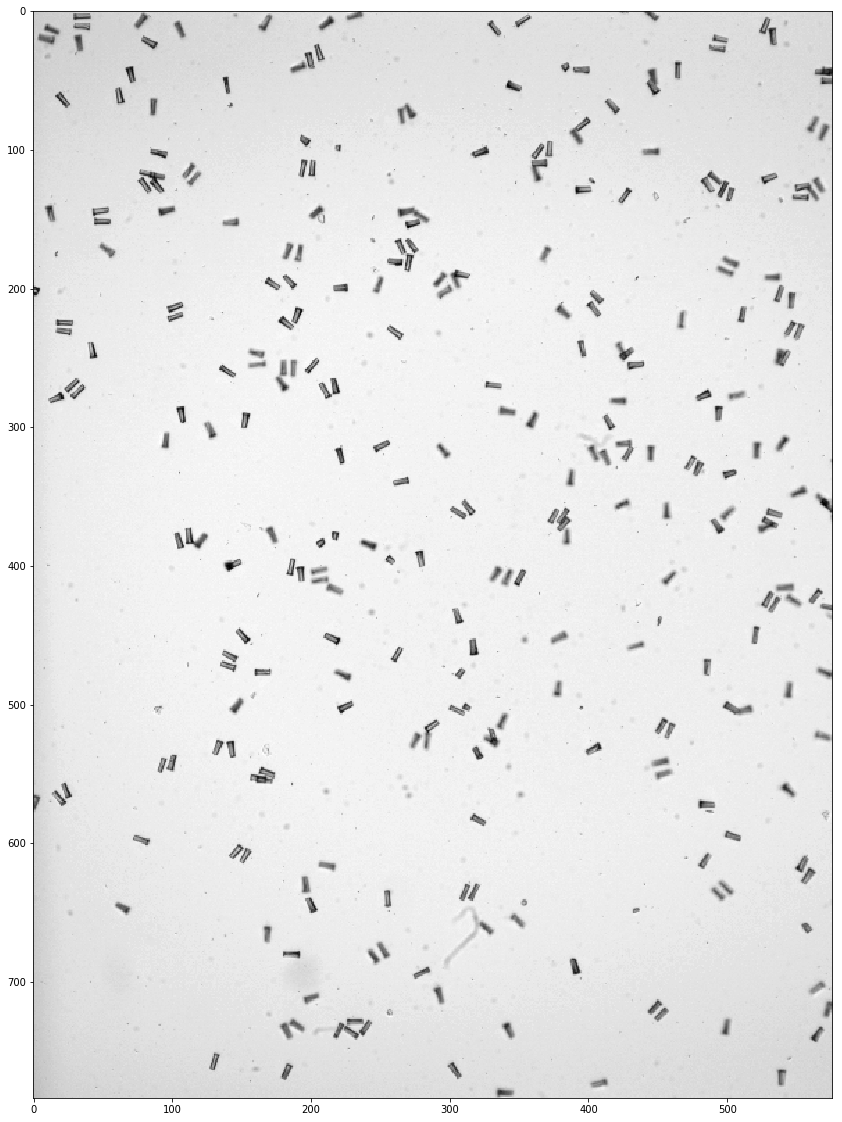

In [11]:
pp=[]

for i in range (leg):
    pp.append(p1[i][:,:,0])
    
plt.imshow(pp[11])

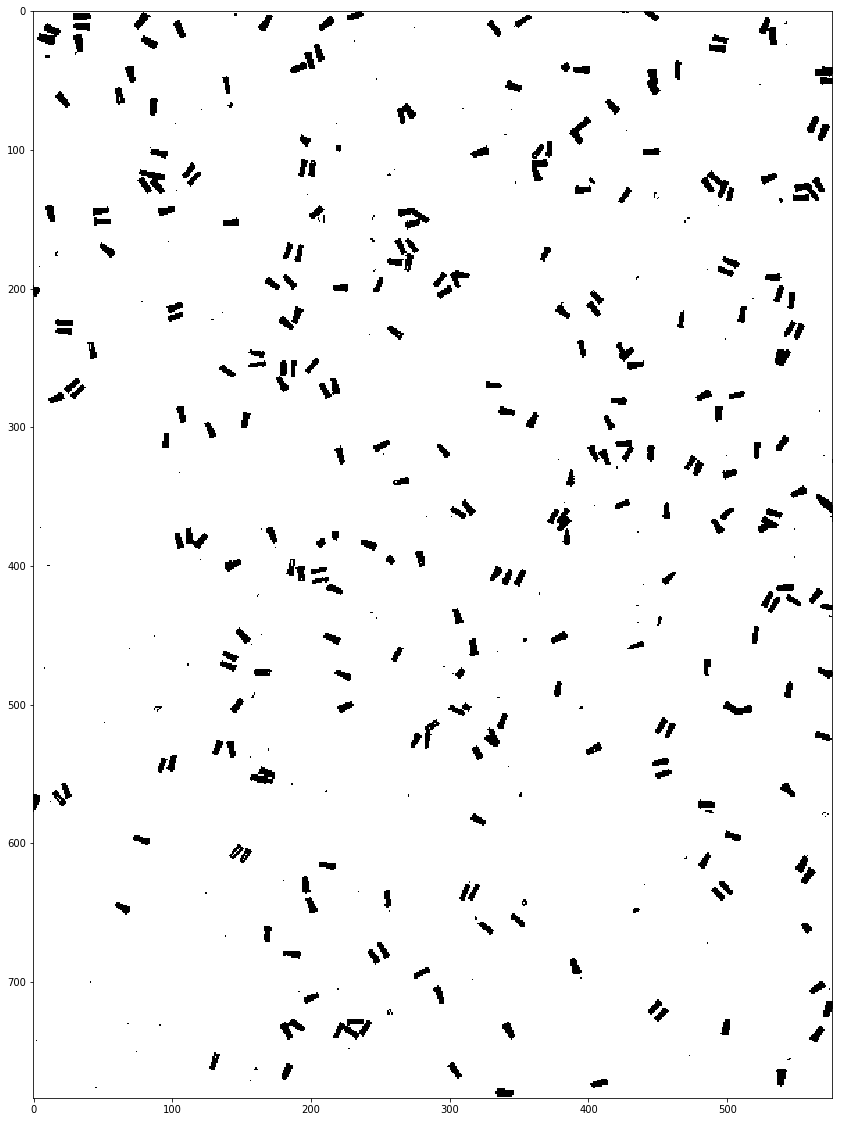

In [12]:
#et,pbinary= cv2.threshold(pp[0],150,255,cv2.THRESH_BINARY)
#pb=[pbinary]
pb=[]

for i in range (0,leg):
    et,pbinary= cv2.threshold(pp[i],140,255,cv2.THRESH_BINARY)
    pb.append(pbinary)

plt.imshow(pb[11])

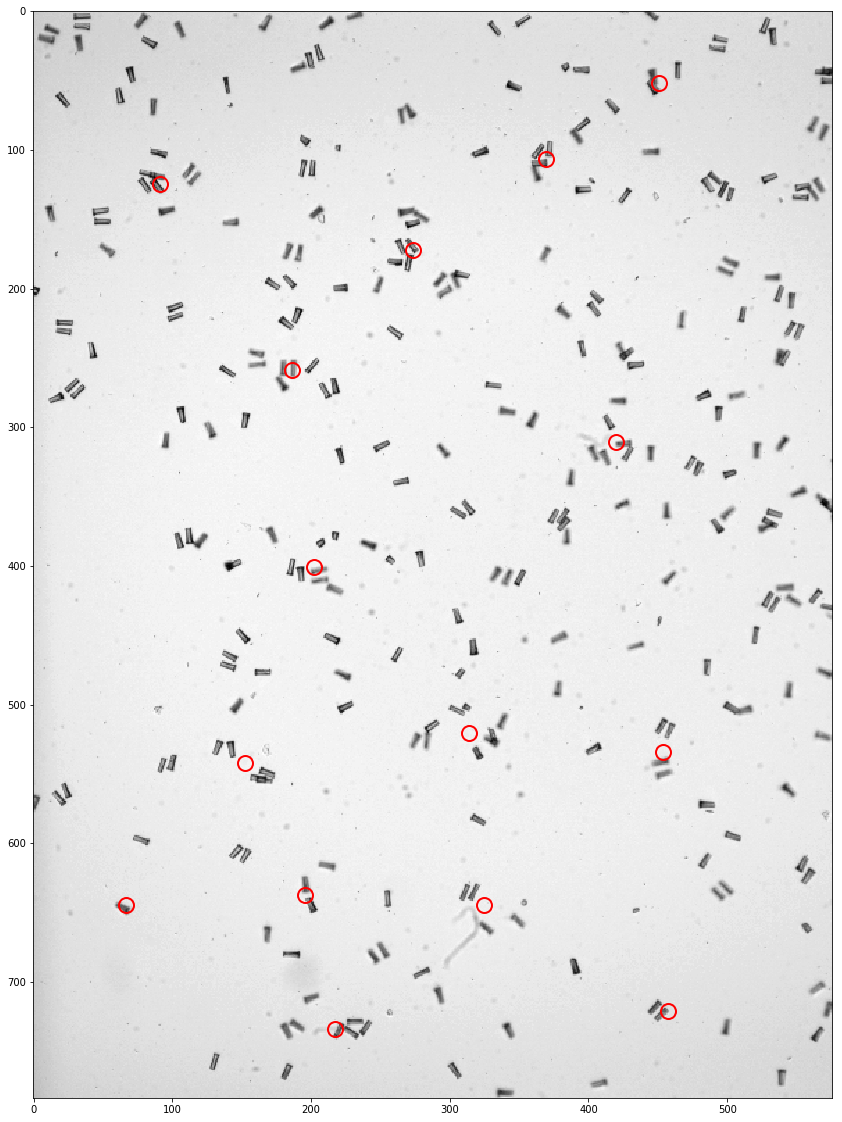

In [40]:
f0 = tp.locate(pb[11],89,invert=True,noise_size=20)

plt.figure()
tp.annotate(f0,pp[11]);

In [14]:
#fig, ax = plt.subplots()
#ax.hist(f0['mass'], bins=10)

# Optionally, label the axes.
#ax.set(xlabel='mass', ylabel='count');

In [15]:
#f00= tp.locate(pb[0], 41,invert=True,separation=20, minmass=2000,noise_size=10)

#plt.figure()
#tp.annotate(f00,pp[0]);

In [47]:
f = tp.batch(pb[:], 45,invert=True,noise_size=5);

Frame 499: 97 features


In [49]:
t = tp.link_df(f, 5, memory=3)

Frame 499: 97 trajectories present.


In [50]:
t1 = tp.filter_stubs(t, 5)

print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 4929
After: 1645


In [51]:
#t1

In [52]:
#plt.figure()
#tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [53]:
#tt = t1[((t1['mass'] > 8000) & (t1['size'] < 8.25) &
#        (t1['ecc'] < 0.1))]

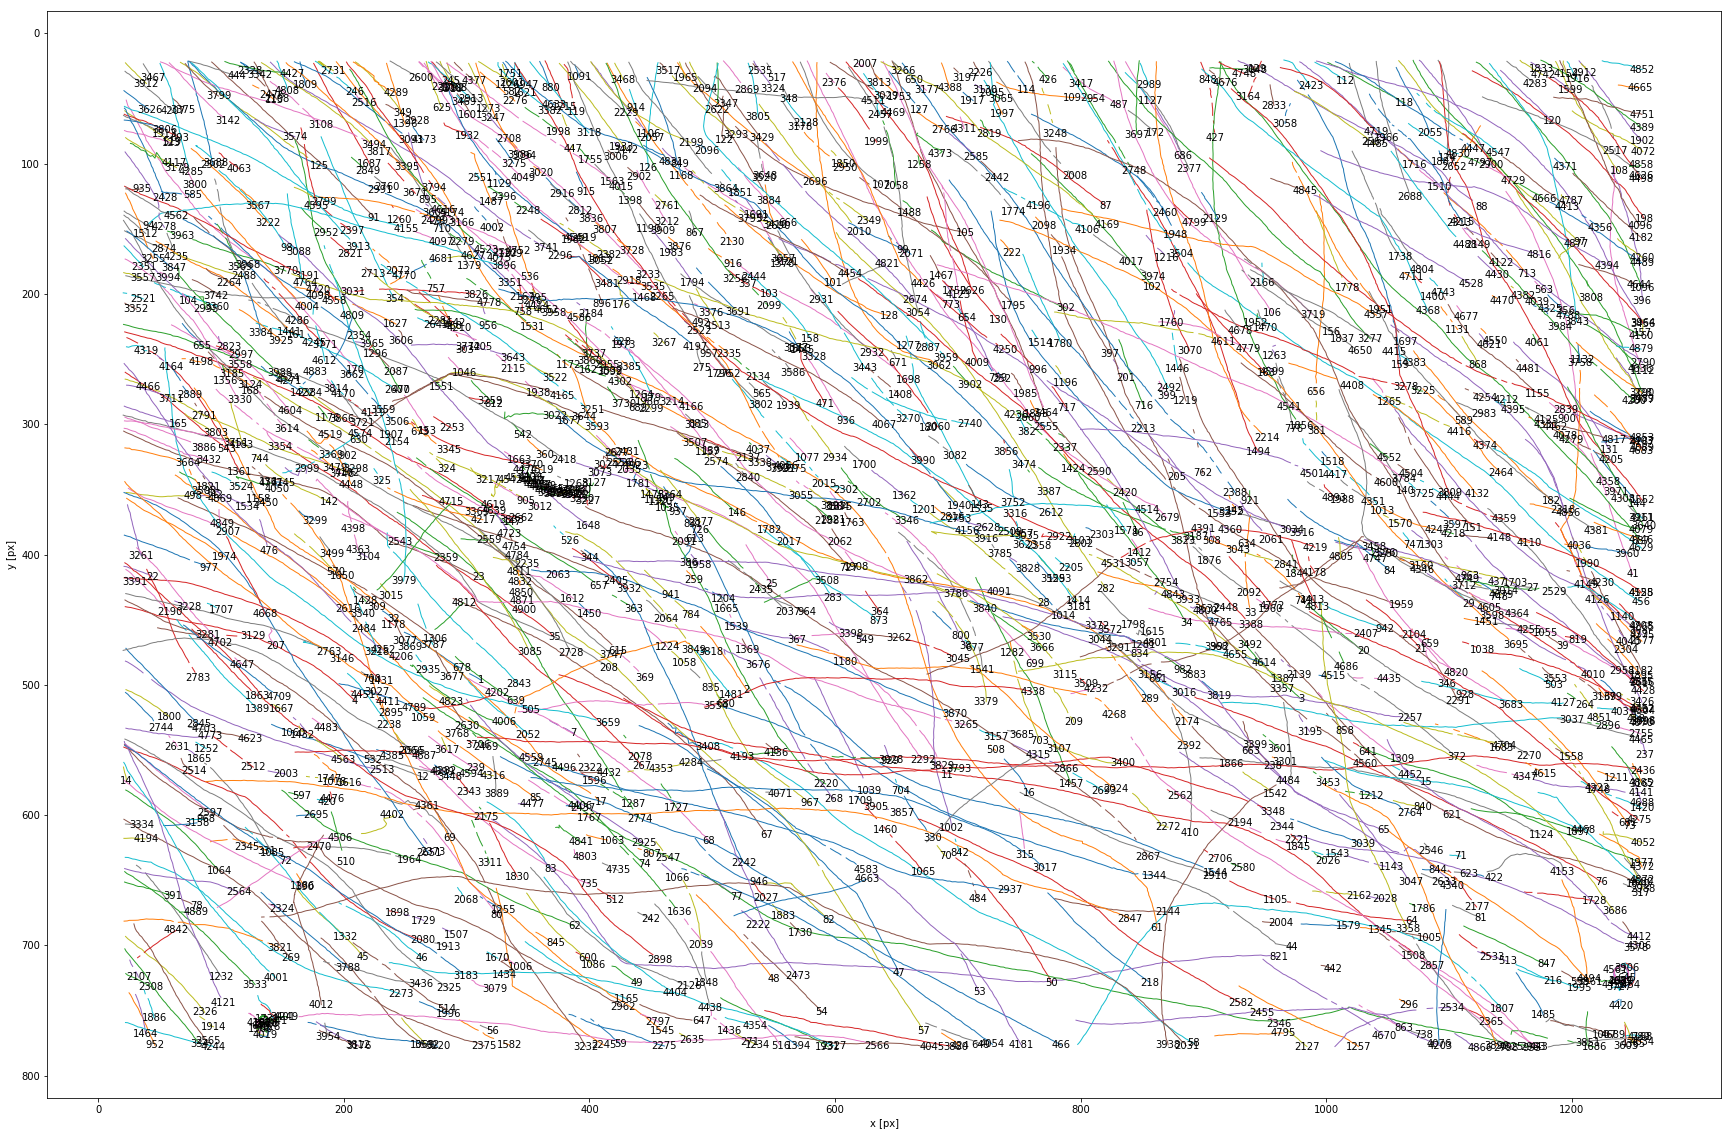

In [54]:
plt.figure()
tp.plot_traj(t1, label=True)

In [55]:
plist=t1['particle'].values
plist=set(plist)
plist=list(plist)

plist

[1,
 2,
 3,
 4,
 7,
 8,
 11,
 12,
 14,
 15,
 16,
 17,
 20,
 21,
 22,
 23,
 25,
 27,
 28,
 29,
 32,
 33,
 34,
 35,
 38,
 39,
 41,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 91,
 92,
 94,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 112,
 114,
 115,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 136,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 151,
 153,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 165,
 168,
 170,
 172,
 176,
 179,
 180,
 182,
 184,
 198,
 201,
 205,
 207,
 208,
 209,
 216,
 218,
 222,
 228,
 236,
 237,
 238,
 239,
 242,
 245,
 246,
 252,
 259,
 264,
 267,
 268,
 269,
 271,
 275,
 282,
 283,
 289,
 296,
 302,
 303,
 308,
 309,
 315,
 317,
 324,
 325,
 330,
 331,
 334,
 337,
 342,
 344,
 346,
 348,
 349,
 354,
 356,
 360,
 363,
 364,
 367,
 368,
 369,
 372,
 381,
 38

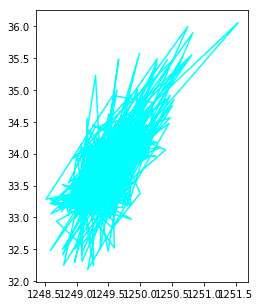

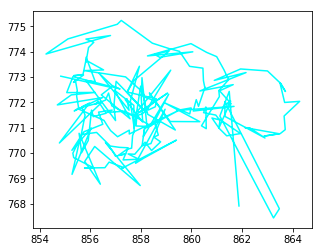

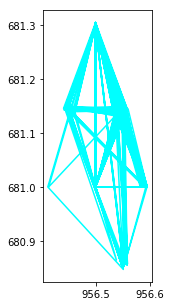

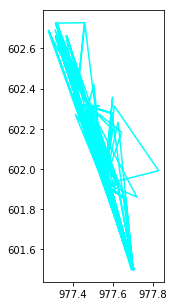

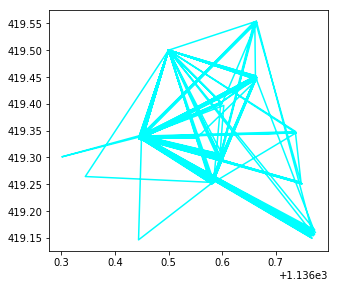

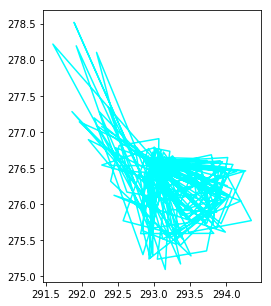

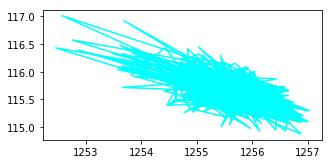

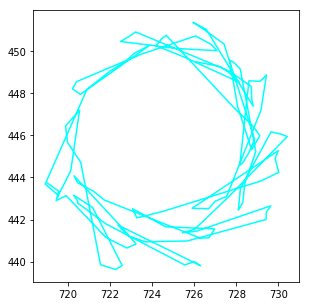

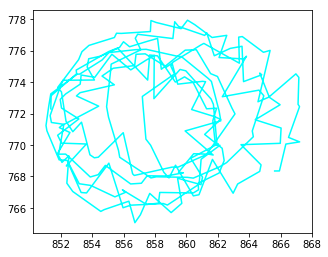

In [758]:
for i in plist[:]:

    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax.plot(t1[t1['particle']==i]['x'].values,t1[t1['particle']==i]['y'].values, color=(0,1,1), alpha=1)  
    ax.set_aspect(1.0)

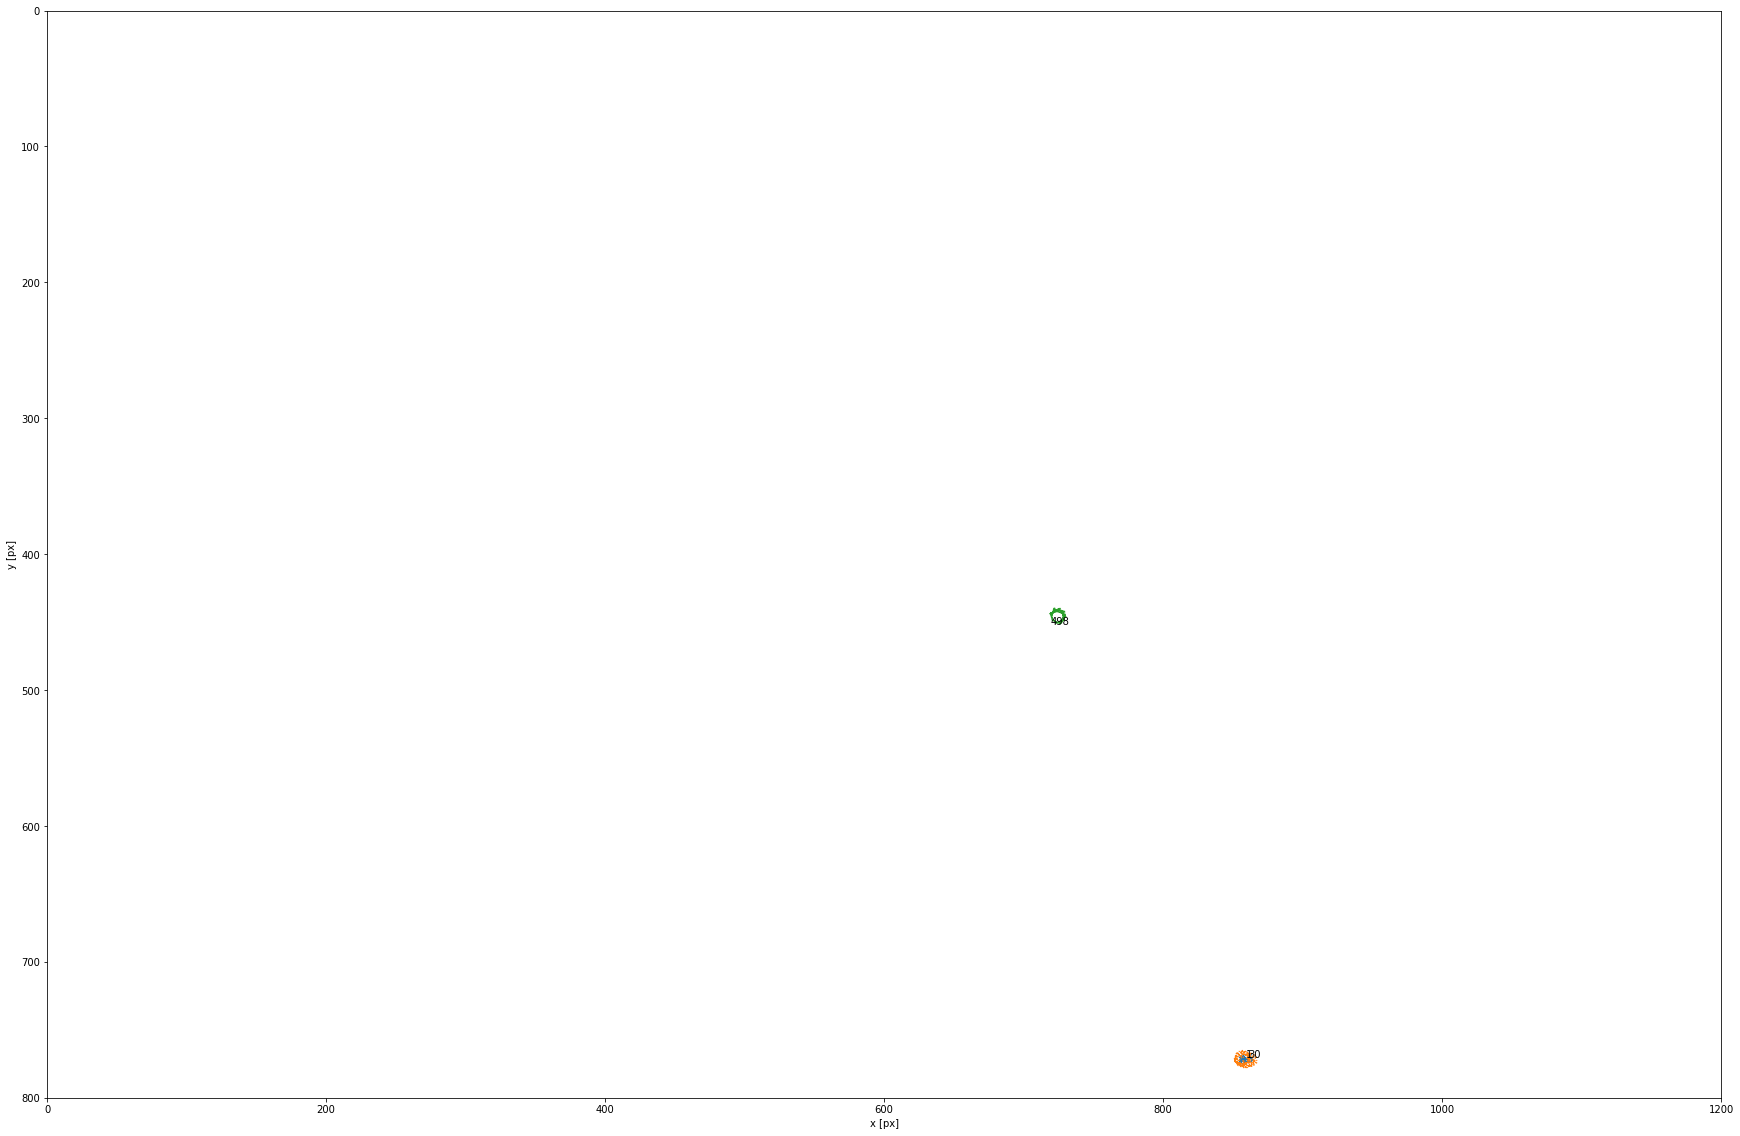

In [759]:
circle=[1,30,498]

t31=[]

for i in circle[:]:
    t31.append(t1[(t1['particle']==i)])

t3 = pd.concat(t31)

plt.figure()
plt.ylim(800,0)
plt.xlim(0,1200)
tp.plot_traj(t3,label=True);


In [760]:
pcirclelist=t3['particle'].values
pcirclelist=set(pcirclelist)
pcirclelist=list(pcirclelist)

pcirclelist

[1, 498, 30]

In [761]:
#dik={}
#for i in plist[:]:
#    dik["px{0}".format(i)]=t1[t1['particle']==i]['x'].values
#    dik["py{0}".format(i)]=t1[t1['particle']==i]['y'].values
#    dik["pf{0}".format(i)]=t1[t1['particle']==i]['frame'].values
#    dik["velo{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
#    dik["vex{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
#    dik["vey{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
#    for j in range(len(dik["pf{0}".format(i)])-1):
#        dik["velo{0}".format(i)][j]=np.sqrt(( dik["py{0}".format(i)][j+1]- dik["py{0}".format(i)][j])**2 \
#                                           +( dik["px{0}".format(i)][j+1]- dik["px{0}".format(i)][j])**2)/(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps
#        dik["vex{0}".format(i)][j]=(dik["px{0}".format(i)][j+1]- dik["px{0}".format(i)][j])/(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps
#        dik["vey{0}".format(i)][j]=(dik["py{0}".format(i)][j+1]- dik["py{0}".format(i)][j])/(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps


In [56]:
dik={}
for i in plist[:]:
    dik["pfreal{0}".format(i)]=t1[t1['particle']==i]['frame'].values
    dik["px{0}".format(i)]=t1[t1['particle']==i]['x'][::1].values
    dik["py{0}".format(i)]=t1[t1['particle']==i]['y'][::1].values
    dik["pf{0}".format(i)]=t1[t1['particle']==i]['frame'][::1].values
    dik["smpx{0}".format(i)]=signal.savgol_filter( dik["px{0}".format(i)], 5, 2)
    dik["smpy{0}".format(i)]=signal.savgol_filter( dik["py{0}".format(i)], 5, 2)
    dik["velo{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["vex{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["vey{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["d2s{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["d2x{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["d2y{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["cur{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["rad{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    for j in range(len(dik["pf{0}".format(i)])-1):
        dik["velo{0}".format(i)][j]=np.sqrt(( dik["smpy{0}".format(i)][j+1]- dik["smpy{0}".format(i)][j])**2 \
                                           +( dik["smpx{0}".format(i)][j+1]- dik["smpx{0}".format(i)][j])**2)\
                                           /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
        dik["vex{0}".format(i)][j]=(dik["smpx{0}".format(i)][j+1]- dik["smpx{0}".format(i)][j])\
                                          /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
        dik["vey{0}".format(i)][j]=(dik["smpy{0}".format(i)][j+1]- dik["smpy{0}".format(i)][j])\
                                          /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
    
    for k in range(len(dik["pf{0}".format(i)])-2):
        dik["d2s{0}".format(i)][k]=(dik["velo{0}".format(i)][k+1]- dik["velo{0}".format(i)][k])\
                                           /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
        dik["d2x{0}".format(i)][k]=(dik["vex{0}".format(i)][k+1]- dik["vex{0}".format(i)][k])\
                                            /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
        dik["d2y{0}".format(i)][k]=(dik["vey{0}".format(i)][k+1]- dik["vey{0}".format(i)][k])\
                                            /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
    
        dik["cur{0}".format(i)][k]=np.abs(dik["d2x{0}".format(i)][k] * dik["vey{0}".format(i)][k] \
                                   - dik["vex{0}".format(i)][k]* dik["d2y{0}".format(i)][k])\
                        / (dik["vex{0}".format(i)][k] * dik["vex{0}".format(i)][k] \
                           + dik["vey{0}".format(i)][k] * dik["vey{0}".format(i)][k])**1.5
    dik["rad{0}".format(i)]=1/dik["cur{0}".format(i)]

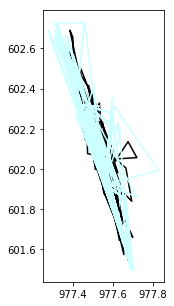

In [763]:
trial=3

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(   dik["smpx{0}".format(trial)], dik["smpy{0}".format(trial)], color=(0,0,0), alpha=1)  
ax.plot(  dik["px{0}".format(trial)],dik["py{0}".format(trial)], color=(0.8,1,1), alpha=1)  
ax.set_aspect(1.0)

In [764]:
#veloarray = np.array([ [dik["vex{0}".format(trial)][i], dik["vey{0}".format(trial)][i]] for i in range(dik["vex{0}".format(trial)].size)])

#veloarray

In [765]:
#tangent = np.array([1/dik["velo{0}".format(trial)]] * 2).transpose() * veloarray

#tangent

In [766]:
#tangent_x = tangent[:, 0]
#tangent_y = tangent[:, 1]

#deriv_tangent_x = np.gradient(tangent_x)
#deriv_tangent_y = np.gradient(tangent_y)

#dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

#length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

#normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

#normal

In [767]:
#d2s=np.zeros(len(dik["pf{0}".format(trial)])-1)
#d2x=np.zeros(len(dik["pf{0}".format(trial)])-1)
#d2y=np.zeros(len(dik["pf{0}".format(trial)])-1)

#for j in range(len(dik["pf{0}".format(trial)])-2):
#    d2s[j] = (dik["velo{0}".format(trial)][j+1]- dik["velo{0}".format(trial)][j])/(dik["pf{0}".format(trial)][j+1]-dik["pf{0}".format(trial)][j])*zoom *fps
#    d2x[j] = (dik["vex{0}".format(trial)][j+1]- dik["vex{0}".format(trial)][j])/(dik["pf{0}".format(trial)][j+1]-dik["pf{0}".format(trial)][j])*zoom *fps
#    d2y[j] = (dik["vey{0}".format(trial)][j+1]- dik["vey{0}".format(trial)][j])/(dik["pf{0}".format(trial)][j+1]-dik["pf{0}".format(trial)][j])*zoom *fps


#curvature = np.abs(d2x * dik["vey{0}".format(trial)] - dik["vex{0}".format(trial)] * d2y) / (dik["vex{0}".format(trial)] * dik["vex{0}".format(trial)] + dik["vey{0}".format(trial)] * dik["vey{0}".format(trial)])**1.5
#t_component = np.array([d2s] * 2).transpose()
#n_component = np.array([curvature * dik["velo{0}".format(trial)] * dik["velo{0}".format(trial)]] * 2).transpose()
#radius=1/curvature

(5, 185)

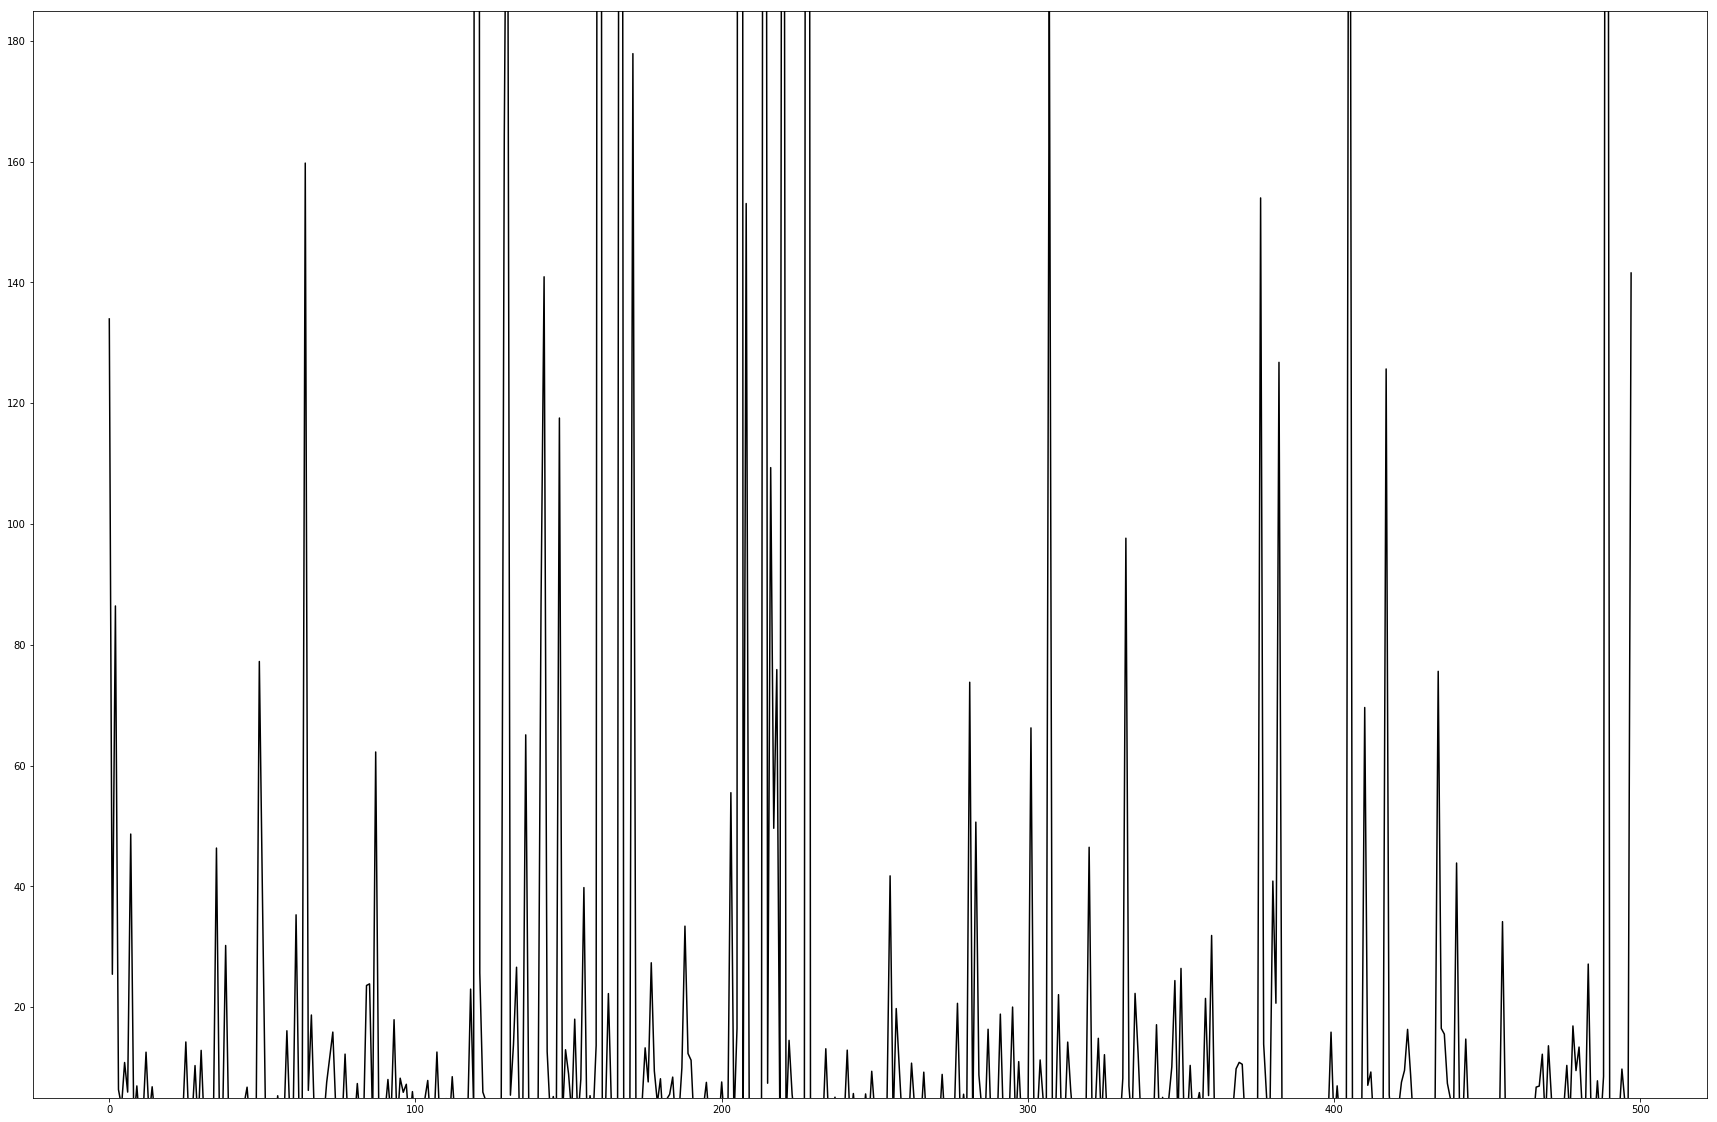

In [768]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(trial)][:len(dik["pf{0}".format(trial)])-2],dik["rad{0}".format(trial)], color=(0,0,0), alpha=1)  

plt.ylim(5,185)
#lt.xlim(0,150)

In [769]:
print ("radius",float(sum(dik["rad{0}".format(trial)]))/max(len(dik["rad{0}".format(trial)]),1))

radius 24.5549756768


IndexError: list index out of range

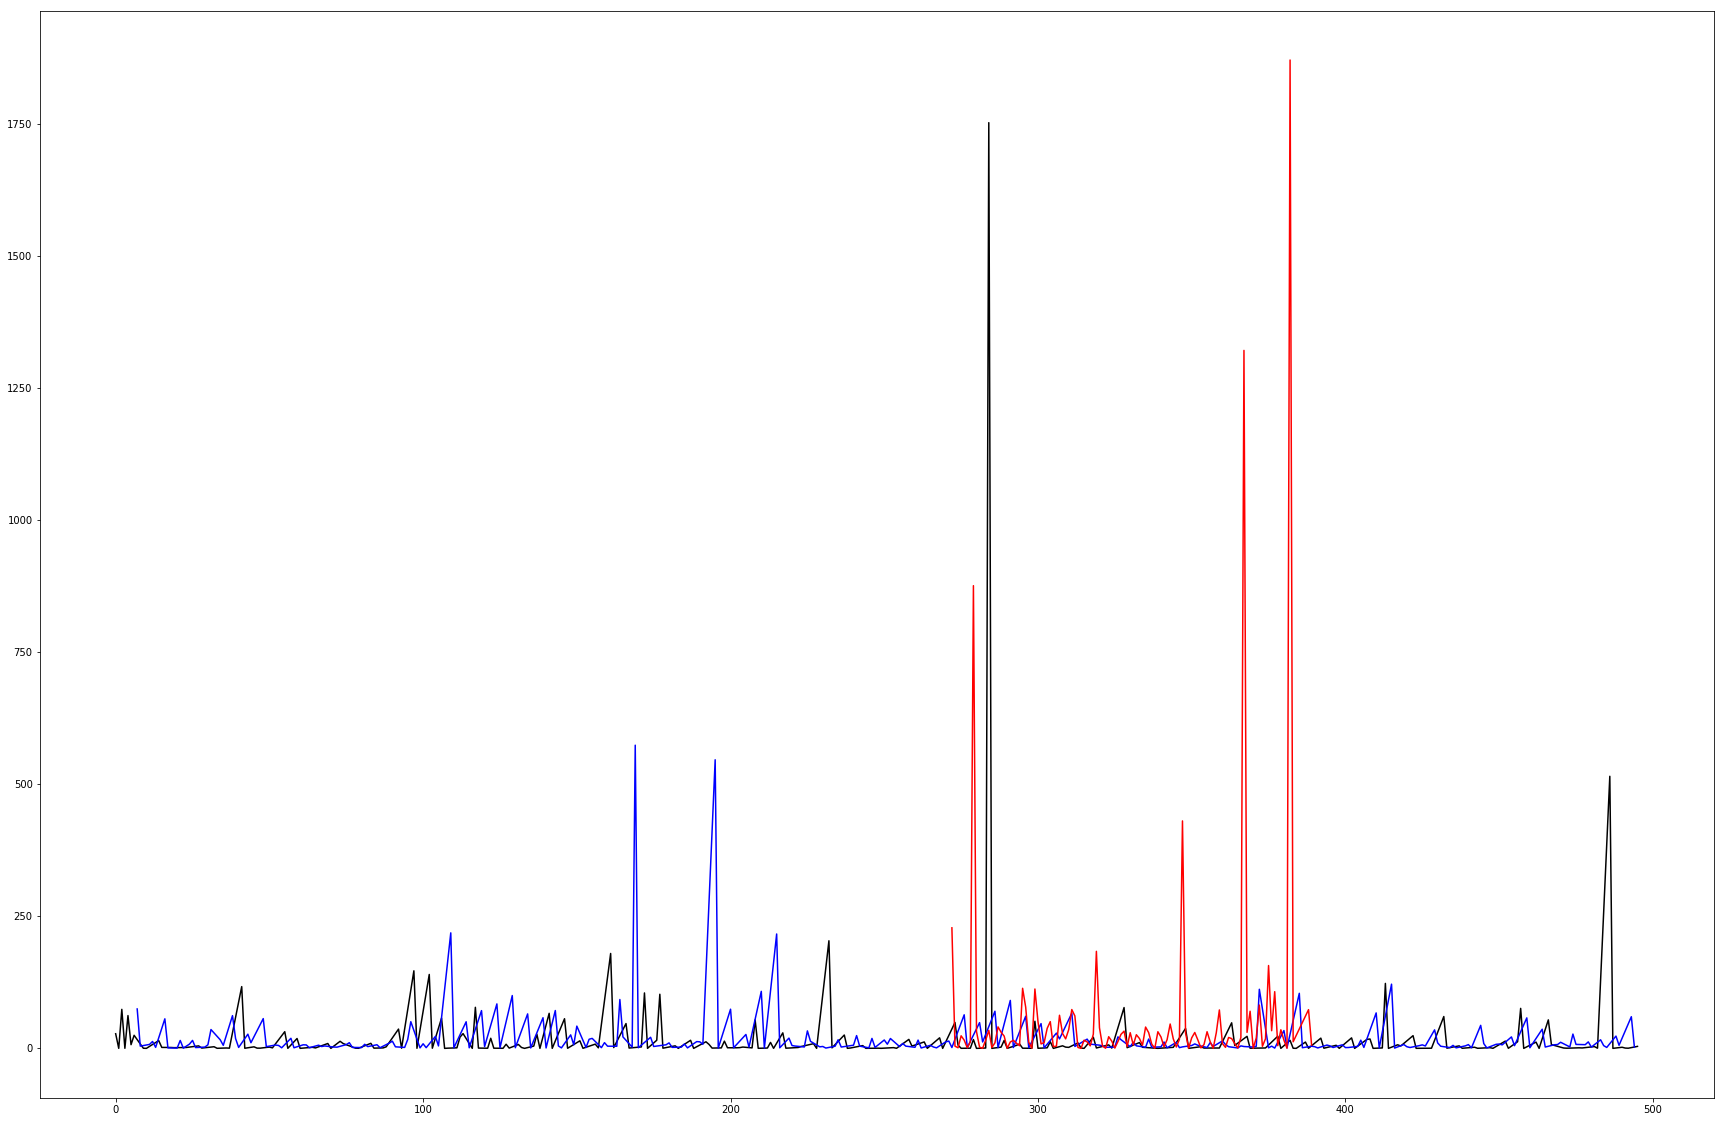

In [770]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(circle[0])][:len(dik["pf{0}".format(circle[0])])-2],dik["rad{0}".format(circle[0])], color=(0,0,0), alpha=1)  
ax.plot(  dik["pf{0}".format(circle[1])][:len(dik["pf{0}".format(circle[1])])-2],dik["rad{0}".format(circle[1])], 'b', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[2])][:len(dik["pf{0}".format(circle[2])])-2],dik["rad{0}".format(circle[2])], 'r', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[3])][:len(dik["pf{0}".format(circle[3])])-2],dik["rad{0}".format(circle[3])], 'y', alpha=1)  


IndexError: list index out of range

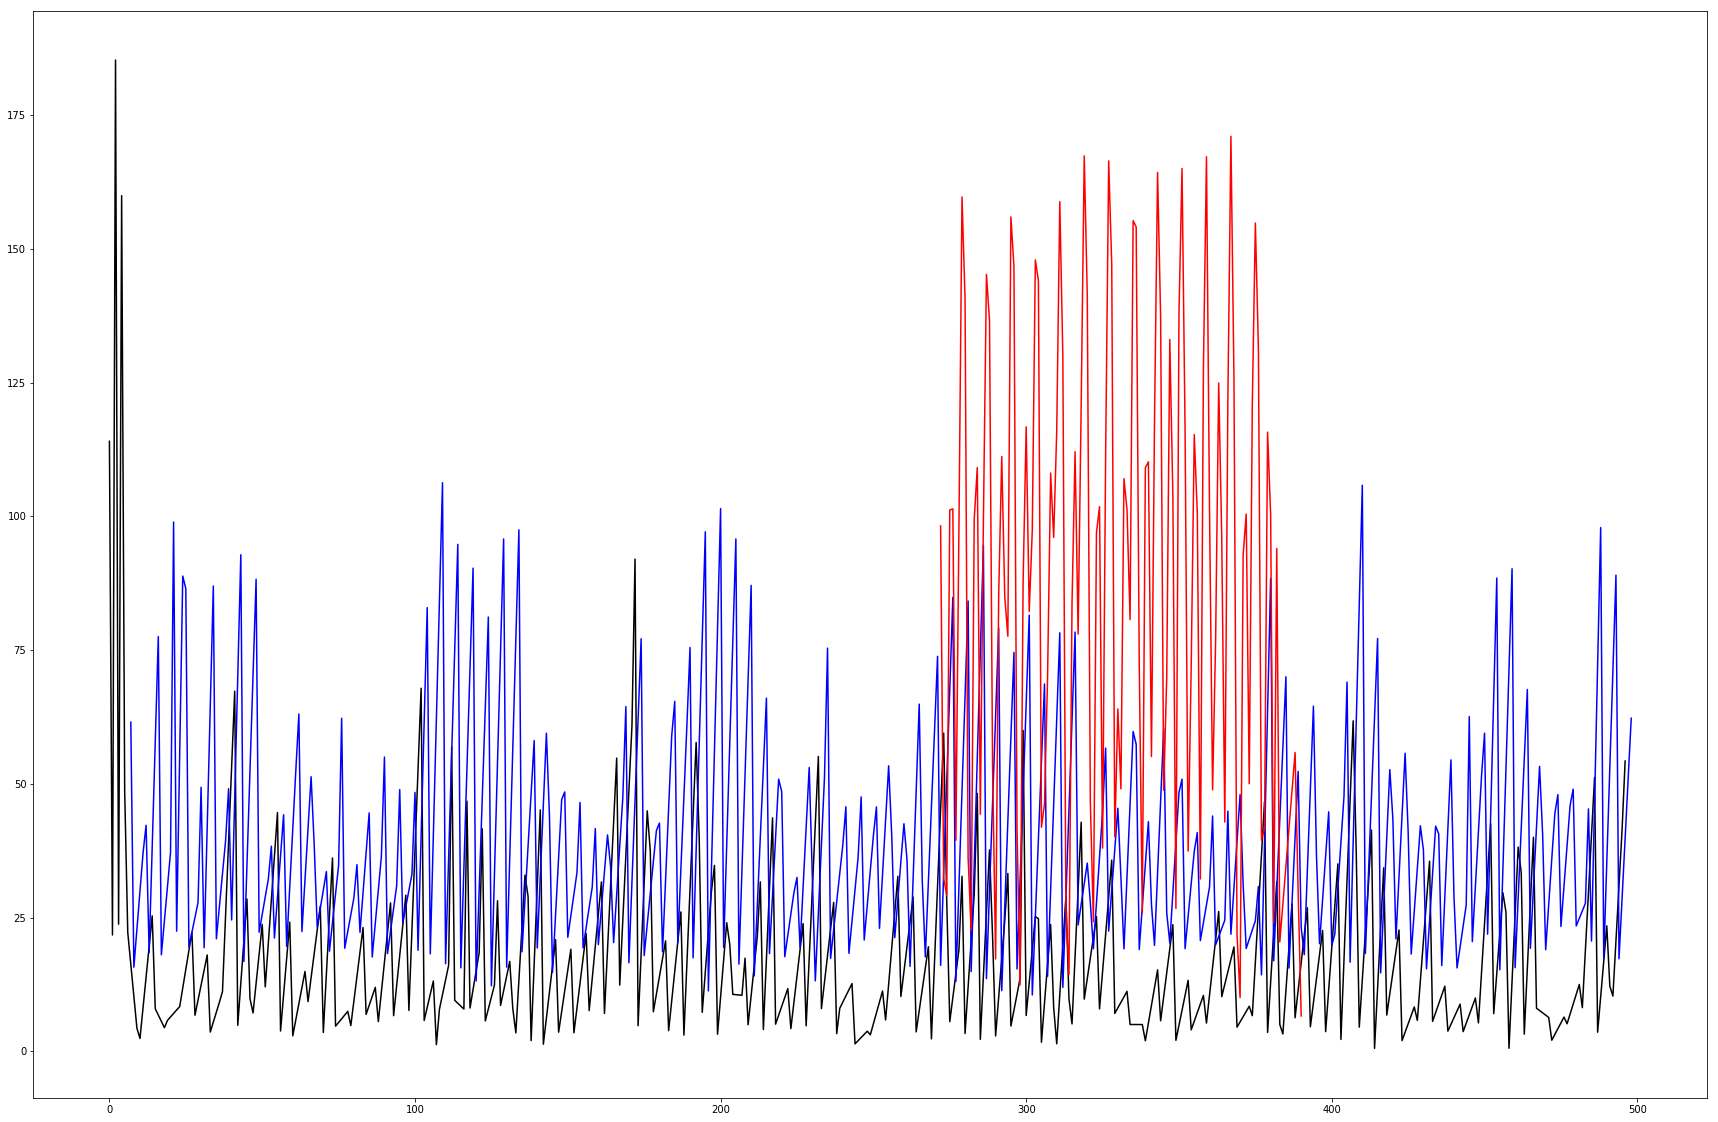

In [771]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(circle[0])][:len(dik["pf{0}".format(circle[0])])-1],dik["velo{0}".format(circle[0])], color=(0,0,0), alpha=1)  
ax.plot(  dik["pf{0}".format(circle[1])][:len(dik["pf{0}".format(circle[1])])-1],dik["velo{0}".format(circle[1])], 'b', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[2])][:len(dik["pf{0}".format(circle[2])])-1],dik["velo{0}".format(circle[2])], 'r', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[3])][:len(dik["pf{0}".format(circle[3])])-1],dik["velo{0}".format(circle[3])], 'y', alpha=1)  

#plt.ylim(0,2000)
#plt.xlim(0,150)

In [772]:
#maxp=max(plist)
#fig, ax = plt.subplots()
#for i in plist[:]:
#    ax.plot(  dik["pf{0}".format(i)][:len(dik["pf{0}".format(i)])-1],dik["velo{0}".format(i)], color=(1-i/maxp,i/maxp,0.5+0.5*i/maxp), alpha=1)  

#plt.ylim(0,5000)
#plt.xlim(0,leg)


In [773]:
for i in pcirclelist[:]:
    print ("particle",i,"(",float(sum(dik["px{0}".format(i)]))/max(len(dik["px{0}".format(i)]),1),",",float(sum(dik["py{0}".format(i)]))/max(len(dik["py{0}".format(i)]),1),")")
    print ("radius",float(sum(dik["rad{0}".format(i)]))/max(len(dik["rad{0}".format(i)]),1))
    print ("velocity",float(sum(dik["velo{0}".format(i)]))/max(len(dik["velo{0}".format(i)]),1))

particle 1 ( 858.274586746 , 771.711237829 )
radius 22.7165058433
velocity 19.7421384406
particle 498 ( 725.088602958 , 445.224124642 )
radius 65.8517620714
velocity 89.7029201504
particle 30 ( 858.227372115 , 771.943286267 )
radius 20.5277724052
velocity 40.7190748014


In [57]:
maxf=[]
for i in range(leg):
    maxf.append(len(t1[t1['frame']==i]))
    
#mf=max(maxf)

mf=11

In [58]:
len(t1[t1['frame']==mf])

153

In [59]:
qupx=[]
qupy=[]
quvx=[]
quvy=[]
for i in plist[:]:
    for j in range(len(dik["pf{0}".format(i)])-1):
        if  dik["pf{0}".format(i)][j]==mf:
            qupx.append(dik["px{0}".format(i)][j])
            qupy.append(dik["py{0}".format(i)][j])
            quvx.append(dik["vex{0}".format(i)][j])
            quvy.append(dik["vey{0}".format(i)][j])
            break

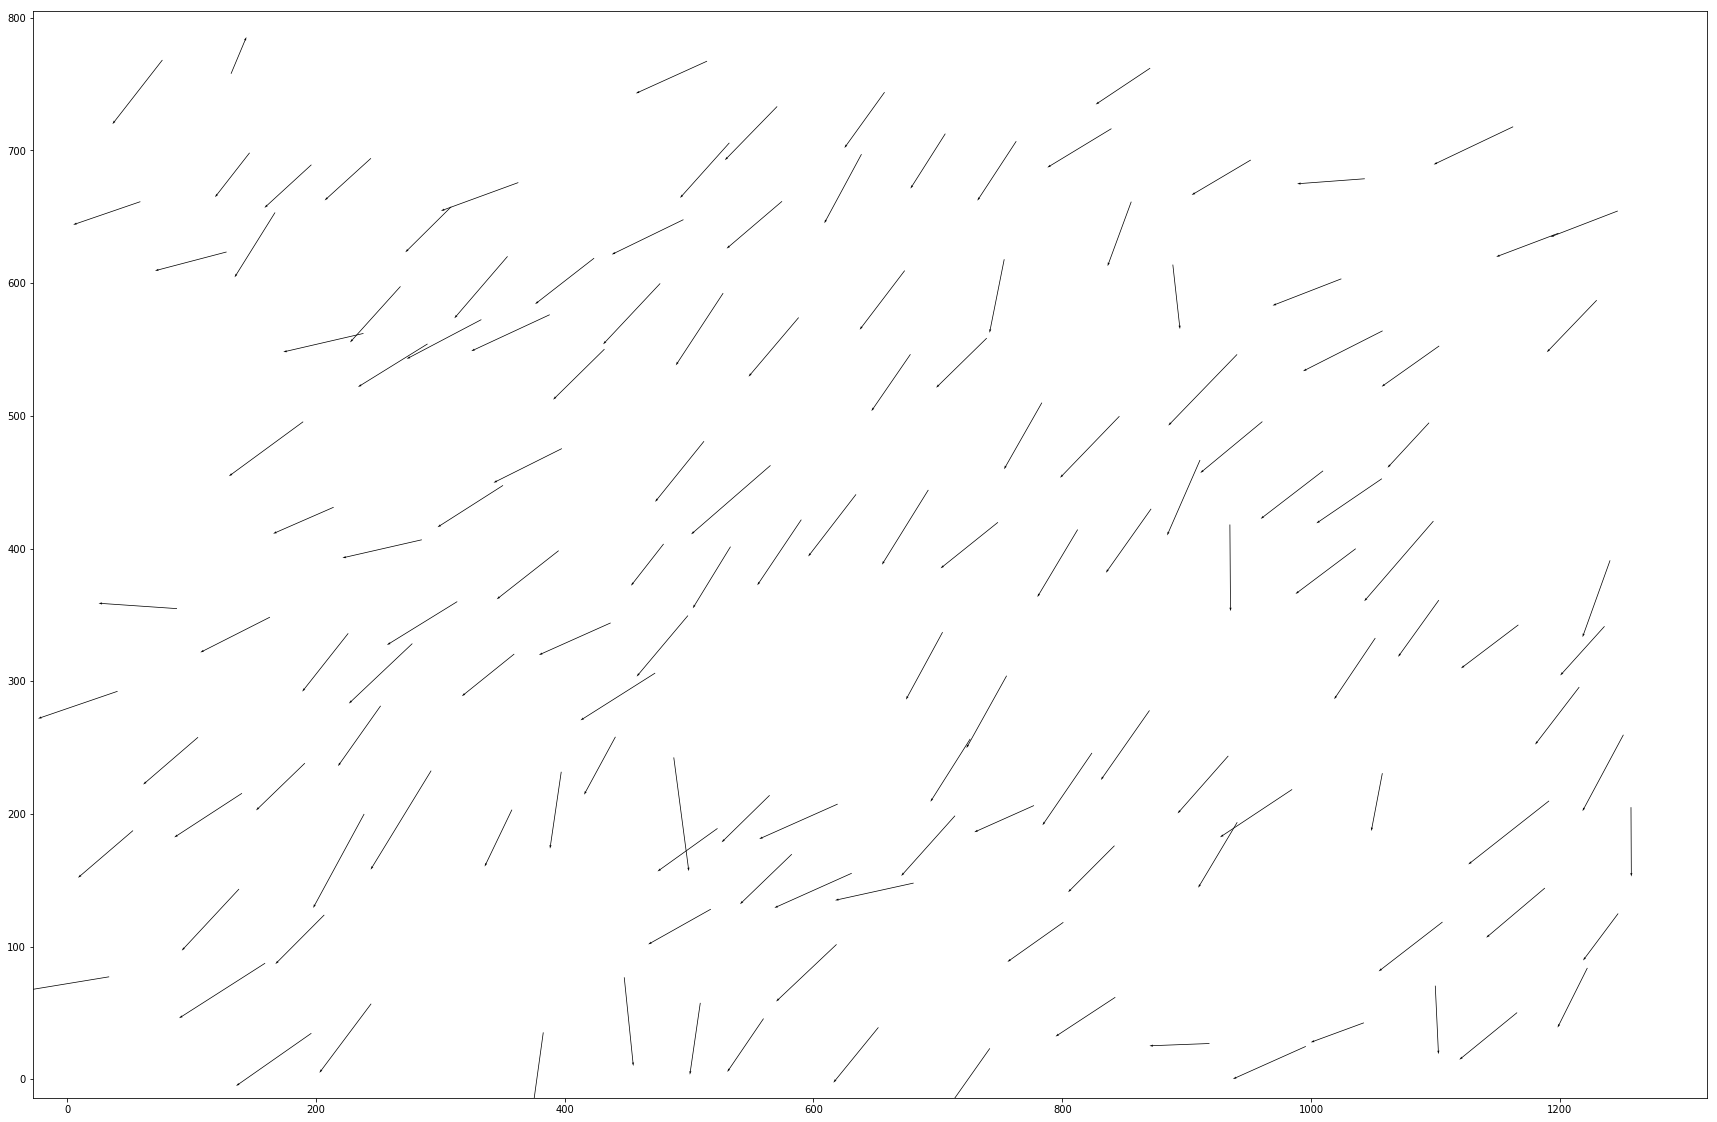

In [60]:
plt.figure()
qu=plt.quiver(qupx,qupy,quvx,quvy,units='inches',width=0.01,color=(0,0,0))


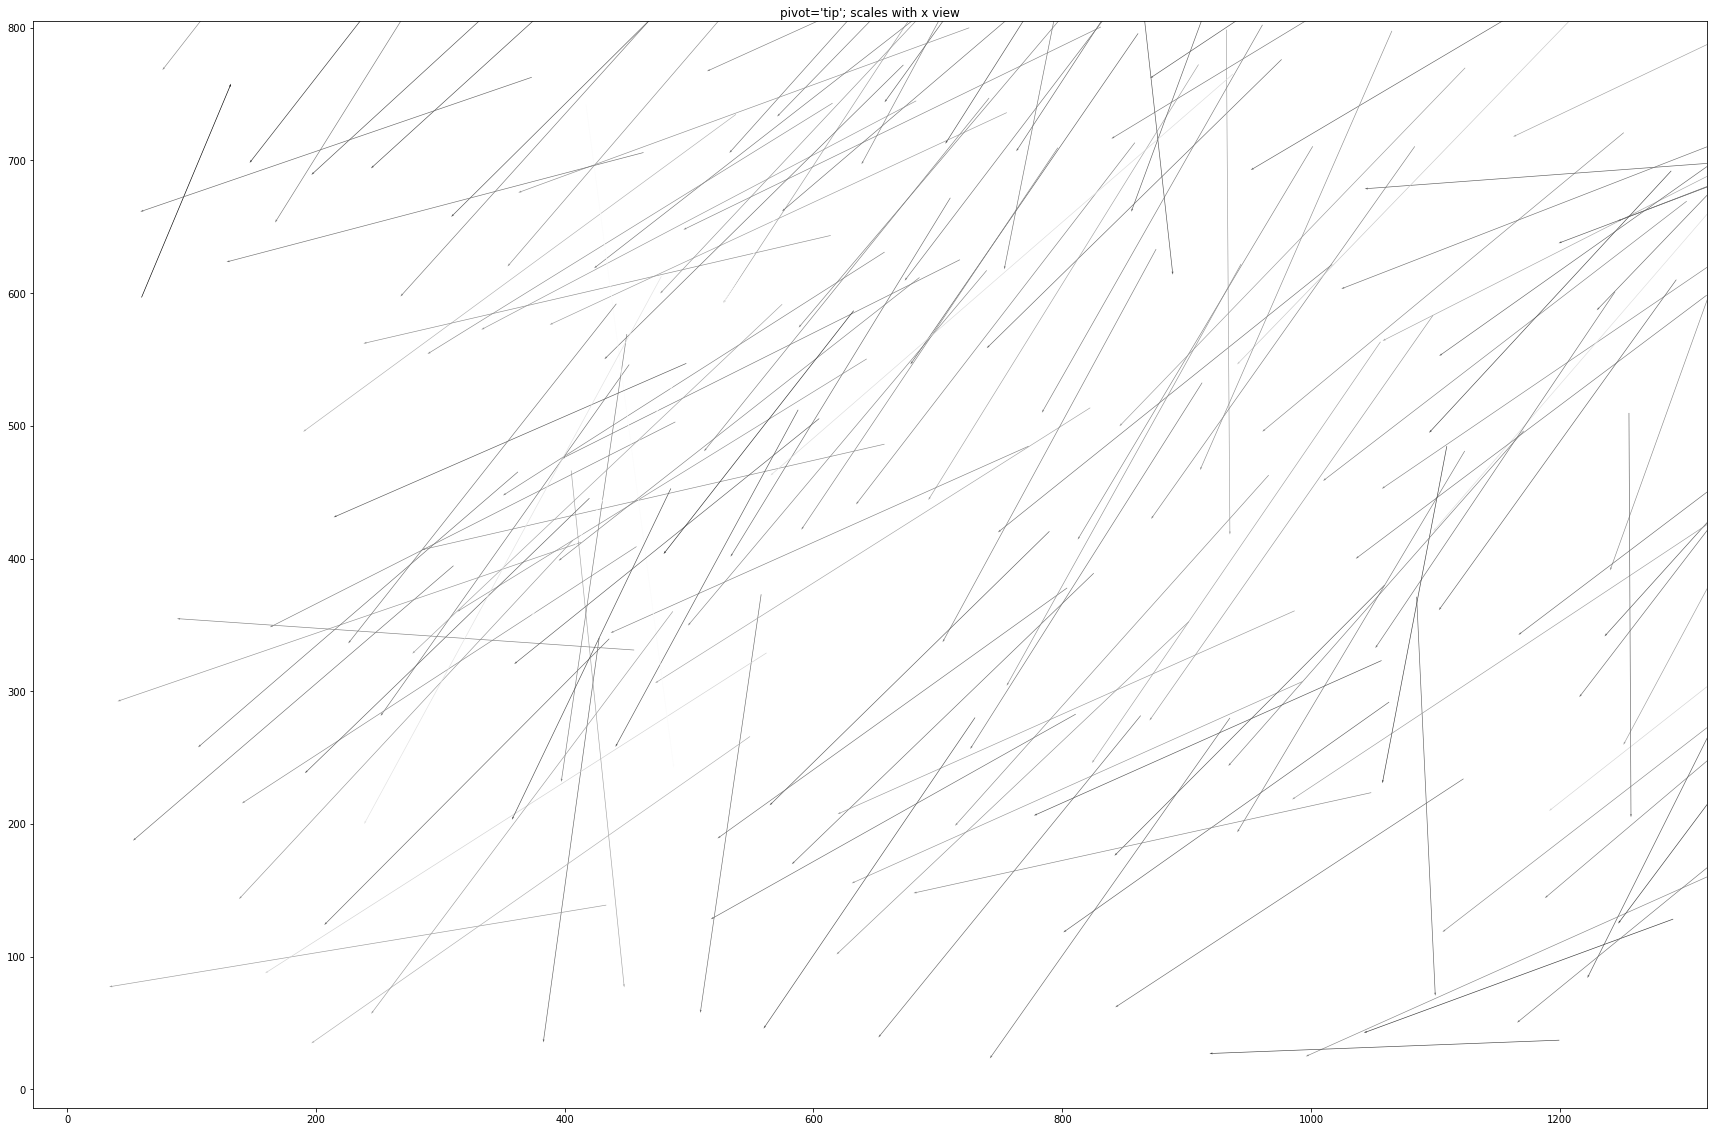

In [78]:
fig3, ax3 = plt.subplots()
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(quvx, quvy)
Q = ax3.quiver(qupx,qupy,quvx,quvy, M, units='x', pivot='tip', width=0.5,scale=1 / 0.15,alpha=1)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',coordinates='figure')
#ax3.scatter(qupx,qupy, color='k', s=5)

plt.show()